# Texas Salary Prediction

## Project Member's Name : 

  #####  1. Logeshwary Selvaraj 
  
  #####  2. Kishore Kumar S 
  
  #####  3. Bharath K 
  
  #####  4. Nawaz Hussain Z 


# 1. Importing Libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

# 2. Importing And Understanding Our Dataset :

In [2]:
df = pd.read_csv('salary.csv')
df.head(5)

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [3]:
pd.set_option('display.max_columns',100)

In [4]:
df.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [5]:
df.tail()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN
149480,809,STATE PRESERVATION BOARD ...,ZUNKER,GEORGIA,P,0130,CUSTOMER SERVICE REP I ...,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,02/16/12,11.74,20.0,1017.46,12209.52,103583,NaN,NaN,NaN,NaN,NaN


### Shape of dataset :

In [6]:
df.shape

(149481, 21)

In [7]:
df.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [8]:
df.dtypes

AGENCY                       int64
AGENCY NAME                 object
LAST NAME                   object
FIRST NAME                  object
MI                          object
CLASS CODE                  object
CLASS TITLE                 object
ETHNICITY                   object
GENDER                      object
STATUS                      object
EMPLOY DATE                 object
HRLY RATE                  float64
HRS PER WK                 float64
MONTHLY                    float64
ANNUAL                     float64
STATE NUMBER                 int64
duplicated                  object
multiple_full_time_jobs    float64
combined_multiple_jobs      object
summed_annual_salary       float64
hide_from_search            object
dtype: object

### Dataset Information :

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

### Check Number of Unique Values for each variable :

In [10]:
df.nunique()

AGENCY                        113
AGENCY NAME                   113
LAST NAME                   38675
FIRST NAME                  23559
MI                             27
CLASS CODE                   1481
CLASS TITLE                  1422
ETHNICITY                       6
GENDER                          2
STATUS                         11
EMPLOY DATE                  6295
HRLY RATE                     206
HRS PER WK                     58
MONTHLY                     40552
ANNUAL                      40554
STATE NUMBER               149465
duplicated                      1
multiple_full_time_jobs         1
combined_multiple_jobs          1
summed_annual_salary           15
hide_from_search                1
dtype: int64

### Dataset Describe :

In [11]:
df.describe()

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


### Finding the Null Values :

In [12]:
df.isnull().sum()

AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

### Renaming the features to a proper name for better understanding :

In [13]:
df.rename(columns={'AGENCY NAME':'Agency_name',
                     'LAST NAME':'Last_name',
                     'FIRST NAME':'First_name',
                     'CLASS CODE':'Class_code',
                     'CLASS TITLE':'Class_title',
                     'EMPLOY DATE':'Employ_date',
                     'HRLY RATE':'Hrly_rate',
                     'HRS PER WK':'Hrs_per_wk',
                     'STATE NUMBER':'State_number'},inplace=True)

In [14]:
df.columns

Index(['AGENCY', 'Agency_name', 'Last_name', 'First_name', 'MI', 'Class_code',
       'Class_title', 'ETHNICITY', 'GENDER', 'STATUS', 'Employ_date',
       'Hrly_rate', 'Hrs_per_wk', 'MONTHLY', 'ANNUAL', 'State_number',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [15]:
#!pip install sweetviz

In [16]:
#import sweetviz as sv
#report = sv.analyze(df)
#report.show_html()

# 4. Exploratory Data Analysis (EDA) :

### Univariate Analysis :

<Axes: xlabel='AGENCY', ylabel='Density'>

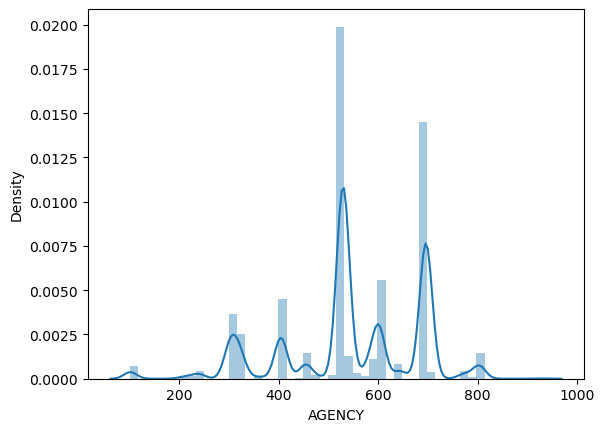

In [17]:
sns.distplot(df.AGENCY)

<Axes: xlabel='MI', ylabel='count'>

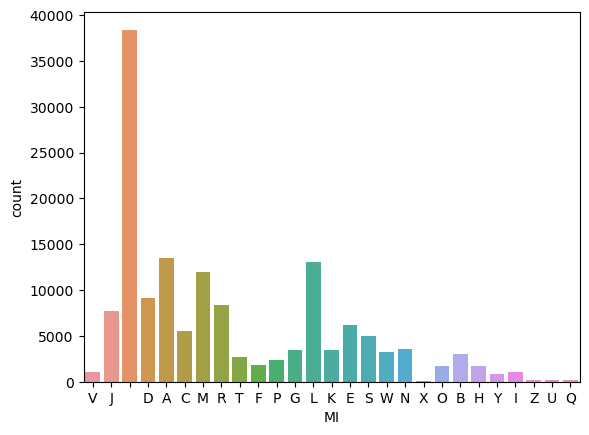

In [18]:
sns.countplot(x = df.MI)

<Axes: xlabel='ETHNICITY', ylabel='count'>

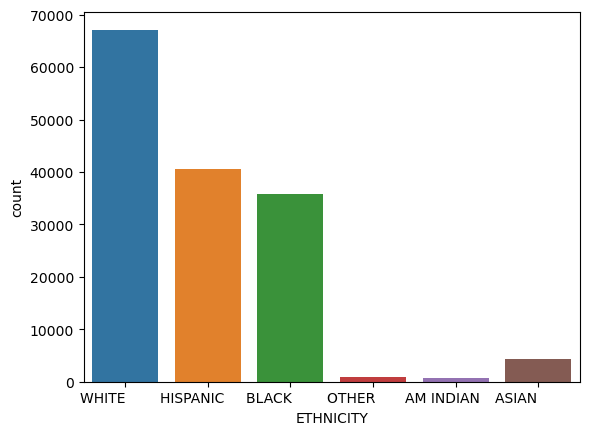

In [19]:
sns.countplot(x=df.ETHNICITY)

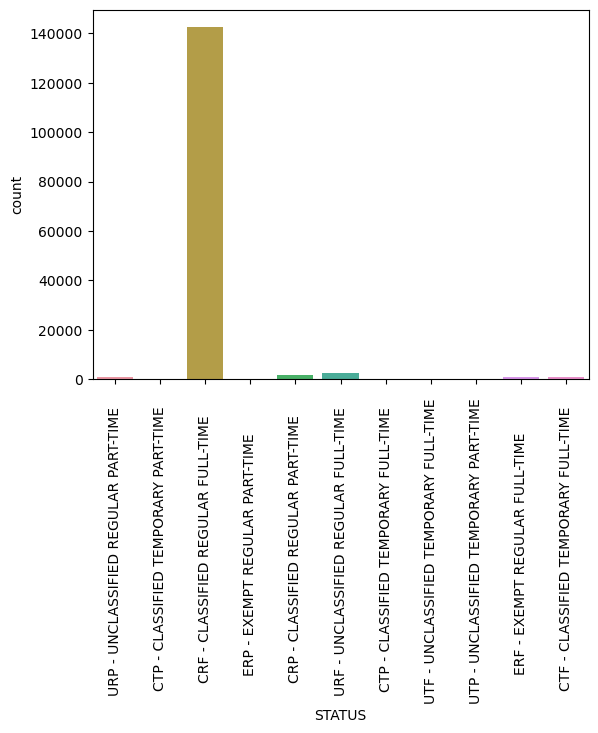

In [20]:
sns.countplot(x=df.STATUS)
plt.xticks(rotation=90)
plt.show()

In [21]:
df.STATUS.value_counts()

CRF - CLASSIFIED REGULAR FULL-TIME          142502
URF - UNCLASSIFIED REGULAR FULL-TIME          2363
CRP - CLASSIFIED REGULAR PART-TIME            1531
CTF - CLASSIFIED TEMPORARY FULL-TIME          1096
URP - UNCLASSIFIED REGULAR PART-TIME           950
ERF - EXEMPT REGULAR FULL-TIME                 923
CTP - CLASSIFIED TEMPORARY PART-TIME            81
UTP - UNCLASSIFIED TEMPORARY PART-TIME          21
UTF - UNCLASSIFIED TEMPORARY FULL-TIME          12
ERP - EXEMPT REGULAR PART-TIME                   1
CTP - CLASSIFIED TEMPORARY FULL-TIME             1
Name: STATUS, dtype: int64

<Axes: xlabel='Hrs_per_wk', ylabel='Count'>

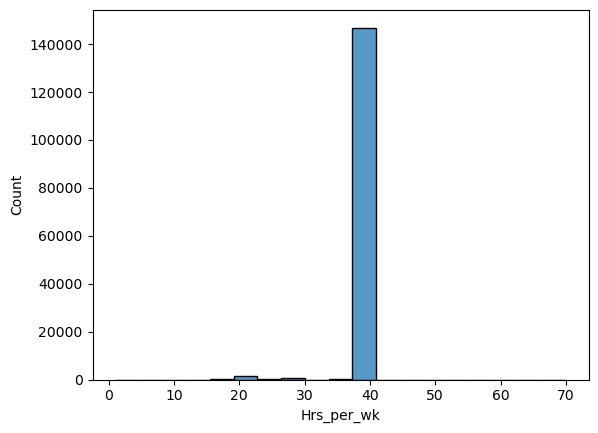

In [22]:
sns.histplot(x=df.Hrs_per_wk)

<Axes: xlabel='Hrly_rate', ylabel='Count'>

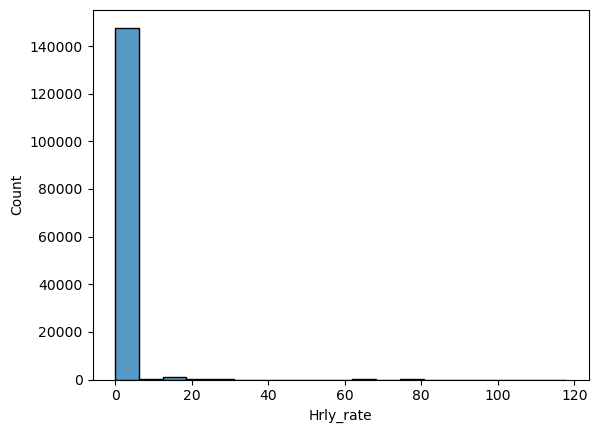

In [23]:
sns.histplot(x=df.Hrly_rate)

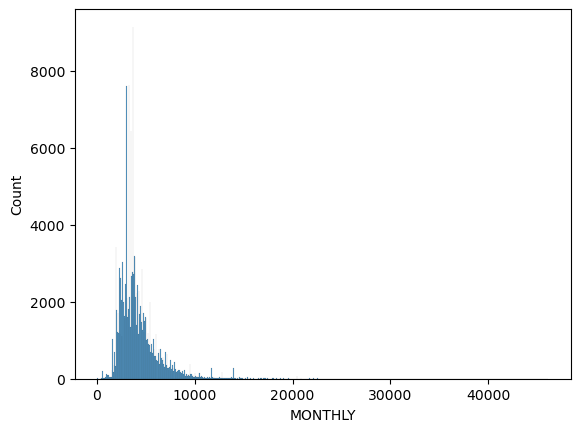

In [24]:
sns.histplot(df.MONTHLY)
plt.show()

In [25]:
df.MONTHLY.value_counts()

3720.17    7391
3284.27    5707
3019.84    4540
3480.77    3318
3906.09    1705
           ... 
5213.39       1
2819.12       1
5290.65       1
5929.30       1
1017.46       1
Name: MONTHLY, Length: 40552, dtype: int64

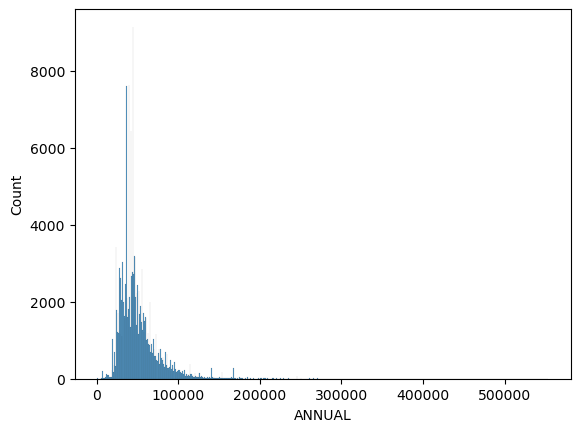

In [26]:
sns.histplot(df.ANNUAL)
plt.show()

In [27]:
df.ANNUAL.value_counts()

44642.04    7391
39411.24    5707
36238.08    4540
41769.24    3318
46873.08    1705
            ... 
63487.80       1
71151.60       1
33373.80       1
39657.84       1
12209.52       1
Name: ANNUAL, Length: 40554, dtype: int64

### Bivariate Analysis

In [28]:
df1=df[['AGENCY','Class_code','Hrly_rate','Hrs_per_wk','MONTHLY','State_number','summed_annual_salary','multiple_full_time_jobs']]

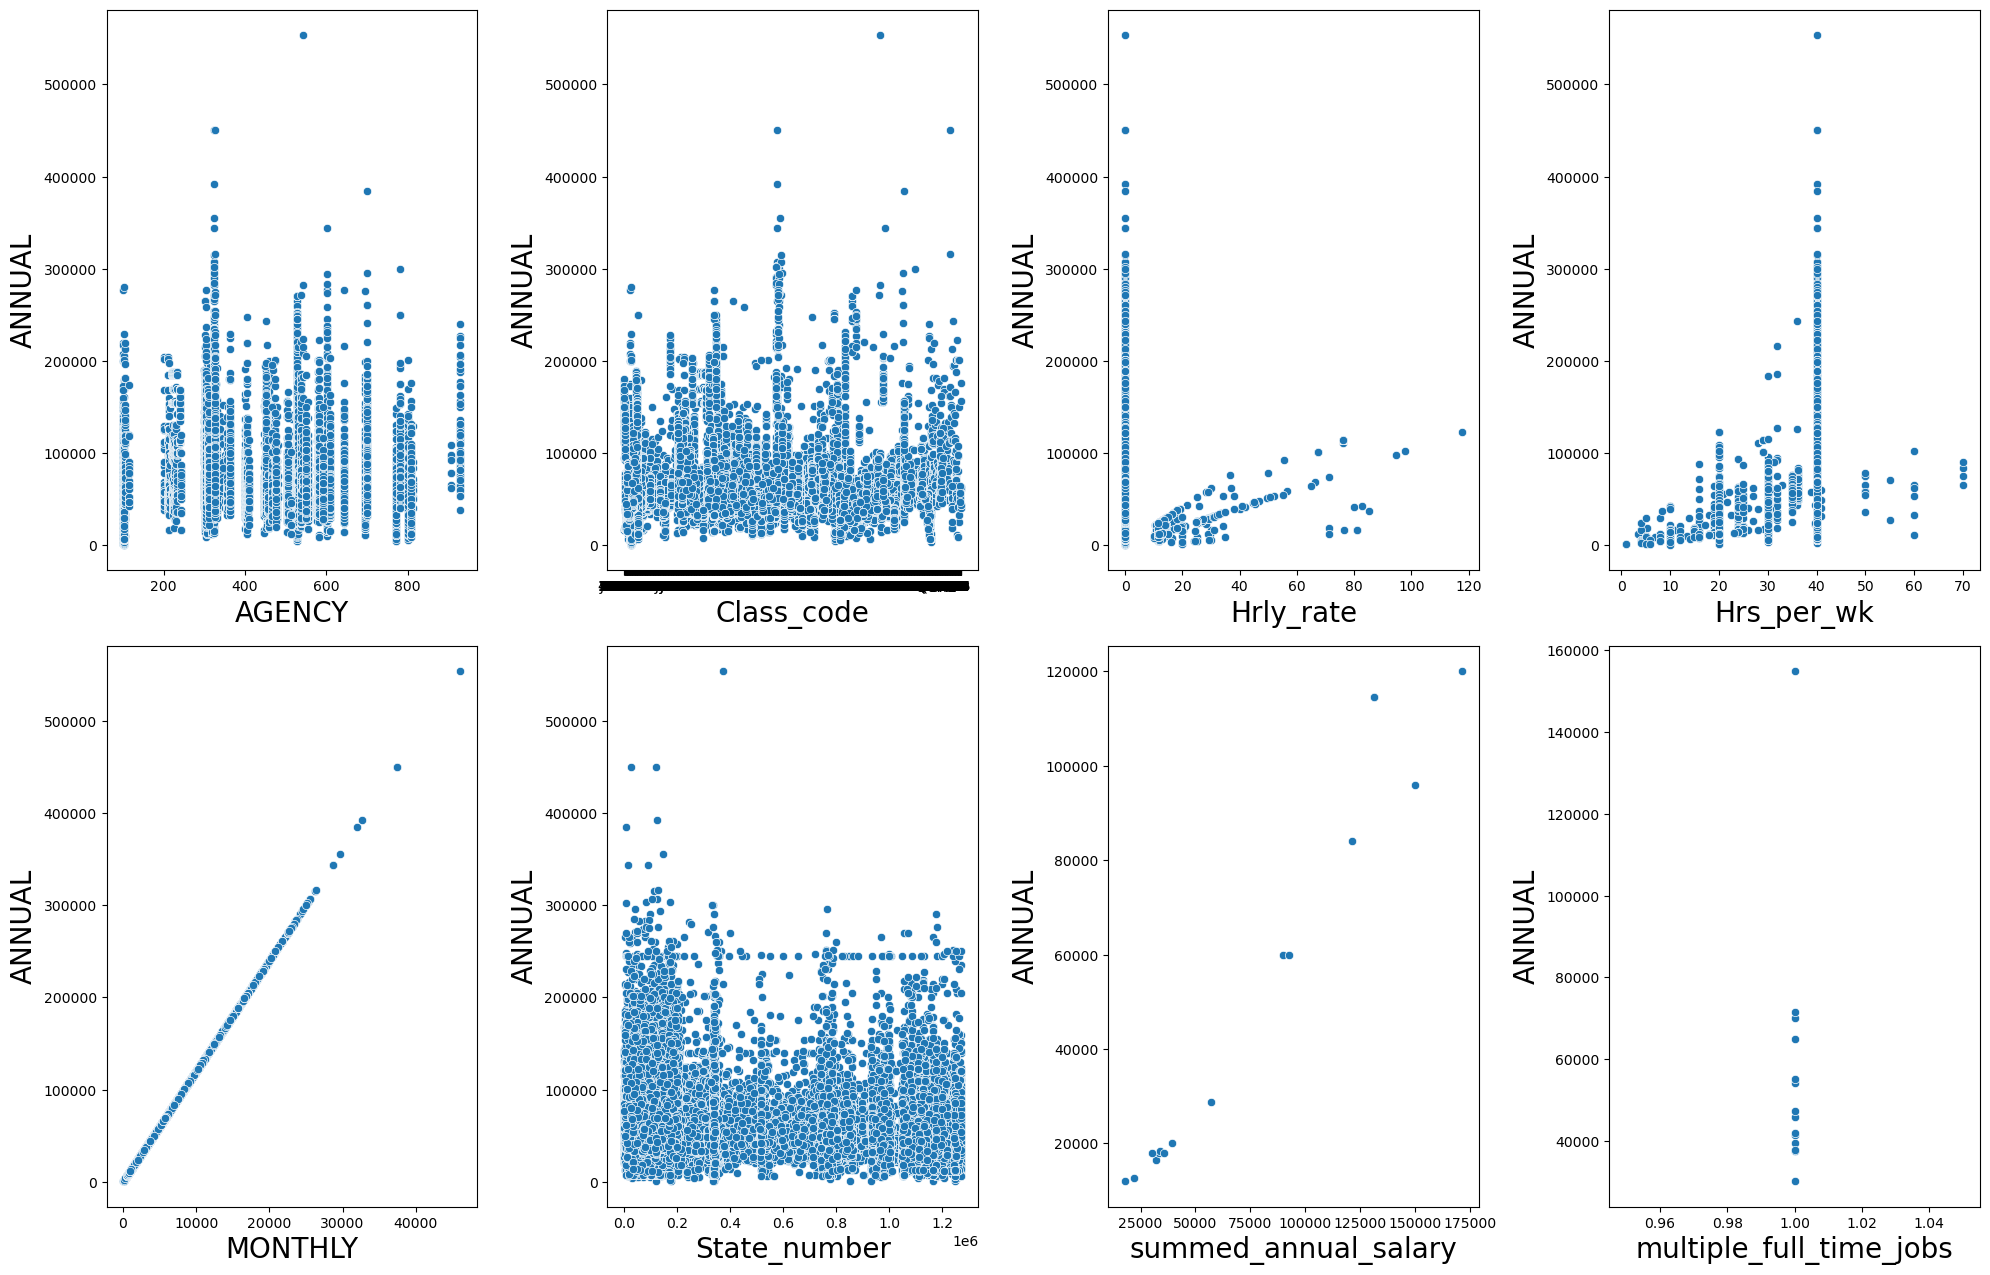

In [29]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in df1:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.scatterplot(x=df1[column],y=df.ANNUAL)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('ANNUAL',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [30]:
df2=df[['ETHNICITY','GENDER','STATUS']]

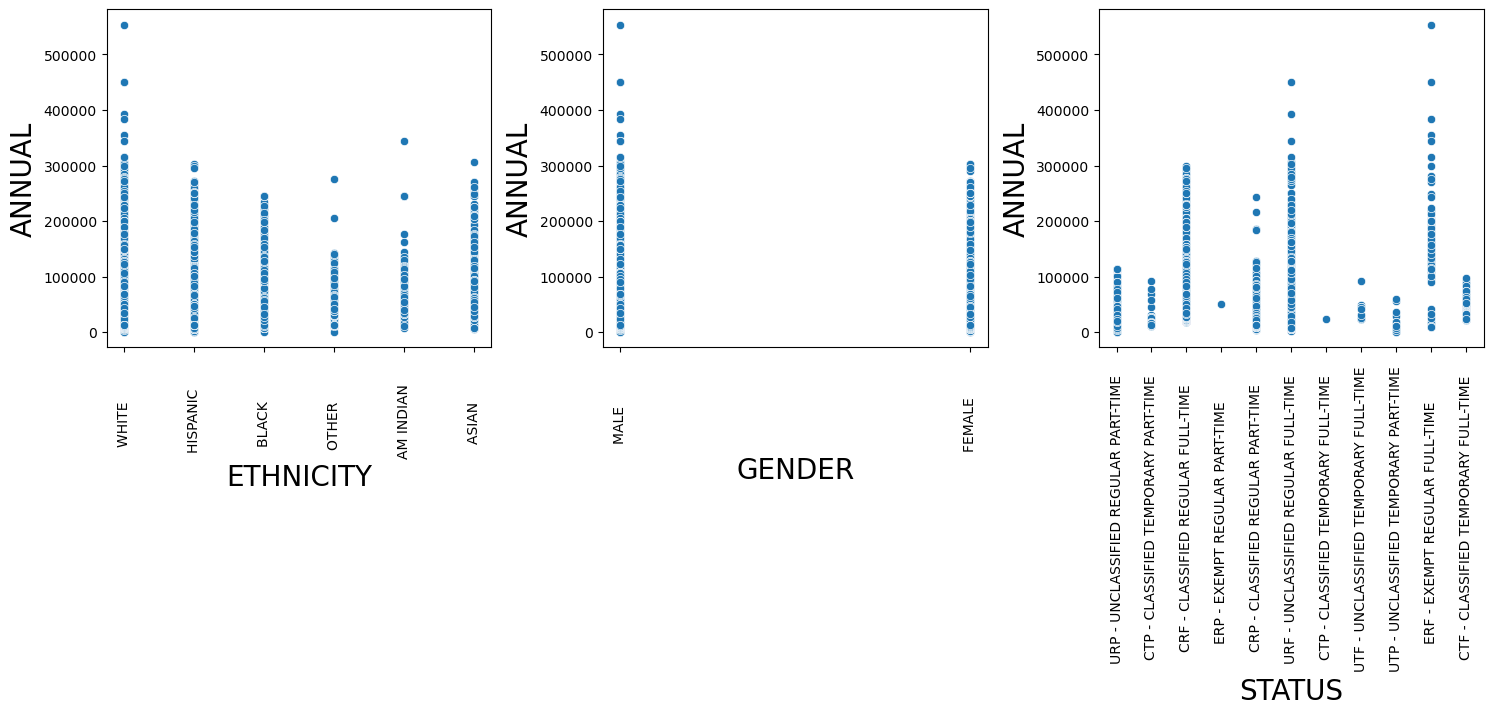

In [31]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in df2:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.scatterplot(x=df2[column],y=df.ANNUAL)
        plt.xlabel(column,fontsize=20)
        plt.xticks(rotation=90)
        plt.ylabel('ANNUAL',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## ~ Finding And Handling Outliers Using Z-Score :

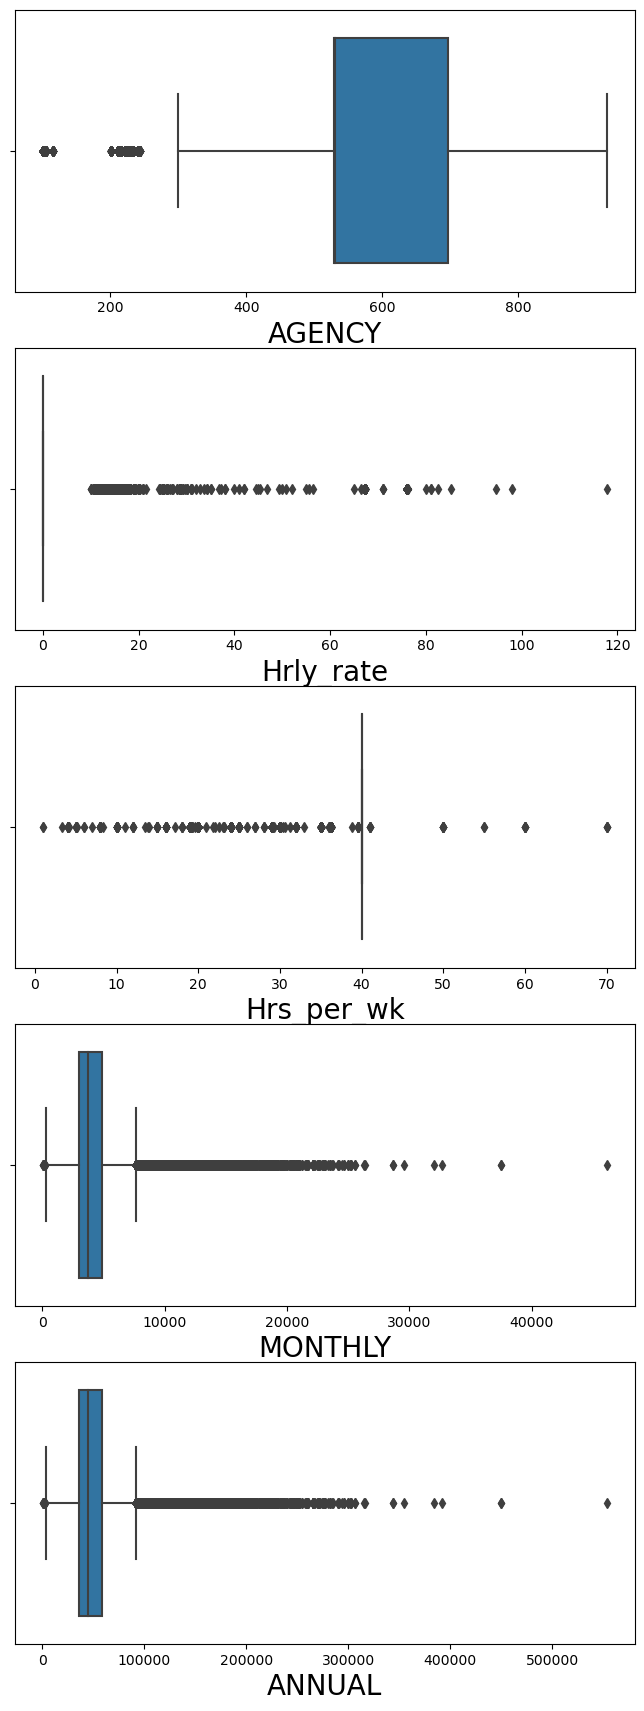

In [32]:
## Let's check for outliers 
box=df[['AGENCY', 'Hrly_rate', 'Hrs_per_wk', 'MONTHLY', 'ANNUAL']]
plt.figure(figsize=(8,30), facecolor='white')
plotnumber = 1

for column in box:
    if plotnumber<=7 :   
        ax = plt.subplot(7,1,plotnumber)
        sns.boxplot(x=box[column])
        plt.xlabel(column,fontsize=20)
      
    plotnumber+=1
plt.show()

##### We will be taking the values inside the range of -3 to +3 standard deviation

#### Replacing the oulier values to its median

In [33]:
upper_limit = df['AGENCY'].mean()+3*df['AGENCY'].std()
lower_limit = df['AGENCY'].mean()-3*df['AGENCY'].std()
print(upper_limit)
print(lower_limit)

df.loc[(df['AGENCY']>upper_limit) | (df['AGENCY']<lower_limit),'AGENCY']=df['AGENCY'].median()

962.9093594049766
128.56321570490354


In [34]:
upper_limit = df['Hrly_rate'].mean()+3*df['Hrly_rate'].std()
lower_limit = df['Hrly_rate'].mean()-3*df['Hrly_rate'].std()
print(upper_limit)
print(lower_limit)

df.loc[(df['Hrly_rate']>upper_limit) | (df['Hrly_rate']<lower_limit),'Hrly_rate']=df['Hrly_rate'].median()

12.980942678574554
-12.287967049698644


In [35]:
upper_limit = df['Hrs_per_wk'].mean()+3*df['Hrs_per_wk'].std()
lower_limit = df['Hrs_per_wk'].mean()-3*df['Hrs_per_wk'].std()
print(upper_limit)
print(lower_limit)

df.loc[(df['Hrs_per_wk']>upper_limit) | (df['Hrs_per_wk']<lower_limit),'Hrs_per_wk']=df['Hrs_per_wk'].median()

46.68648173449758
32.74335403058293


In [36]:
upper_limit = df['MONTHLY'].mean()+3*df['MONTHLY'].std()
lower_limit = df['MONTHLY'].mean()-3*df['MONTHLY'].std()
print(upper_limit)
print(lower_limit)

df.loc[(df['MONTHLY']>upper_limit) | (df['MONTHLY']<lower_limit),'MONTHLY']=df['MONTHLY'].median()

10505.519320711186
-2053.1508251833257


In [37]:
upper_limit = df['ANNUAL'].mean()+3*df['ANNUAL'].std()
lower_limit = df['ANNUAL'].mean()-3*df['ANNUAL'].std()
print(upper_limit)
print(lower_limit)

df.loc[(df['ANNUAL']>upper_limit) | (df['ANNUAL']<lower_limit),'ANNUAL']=df['ANNUAL'].median()

126066.23184851333
-24637.809902179026


### Finding Correlation : 

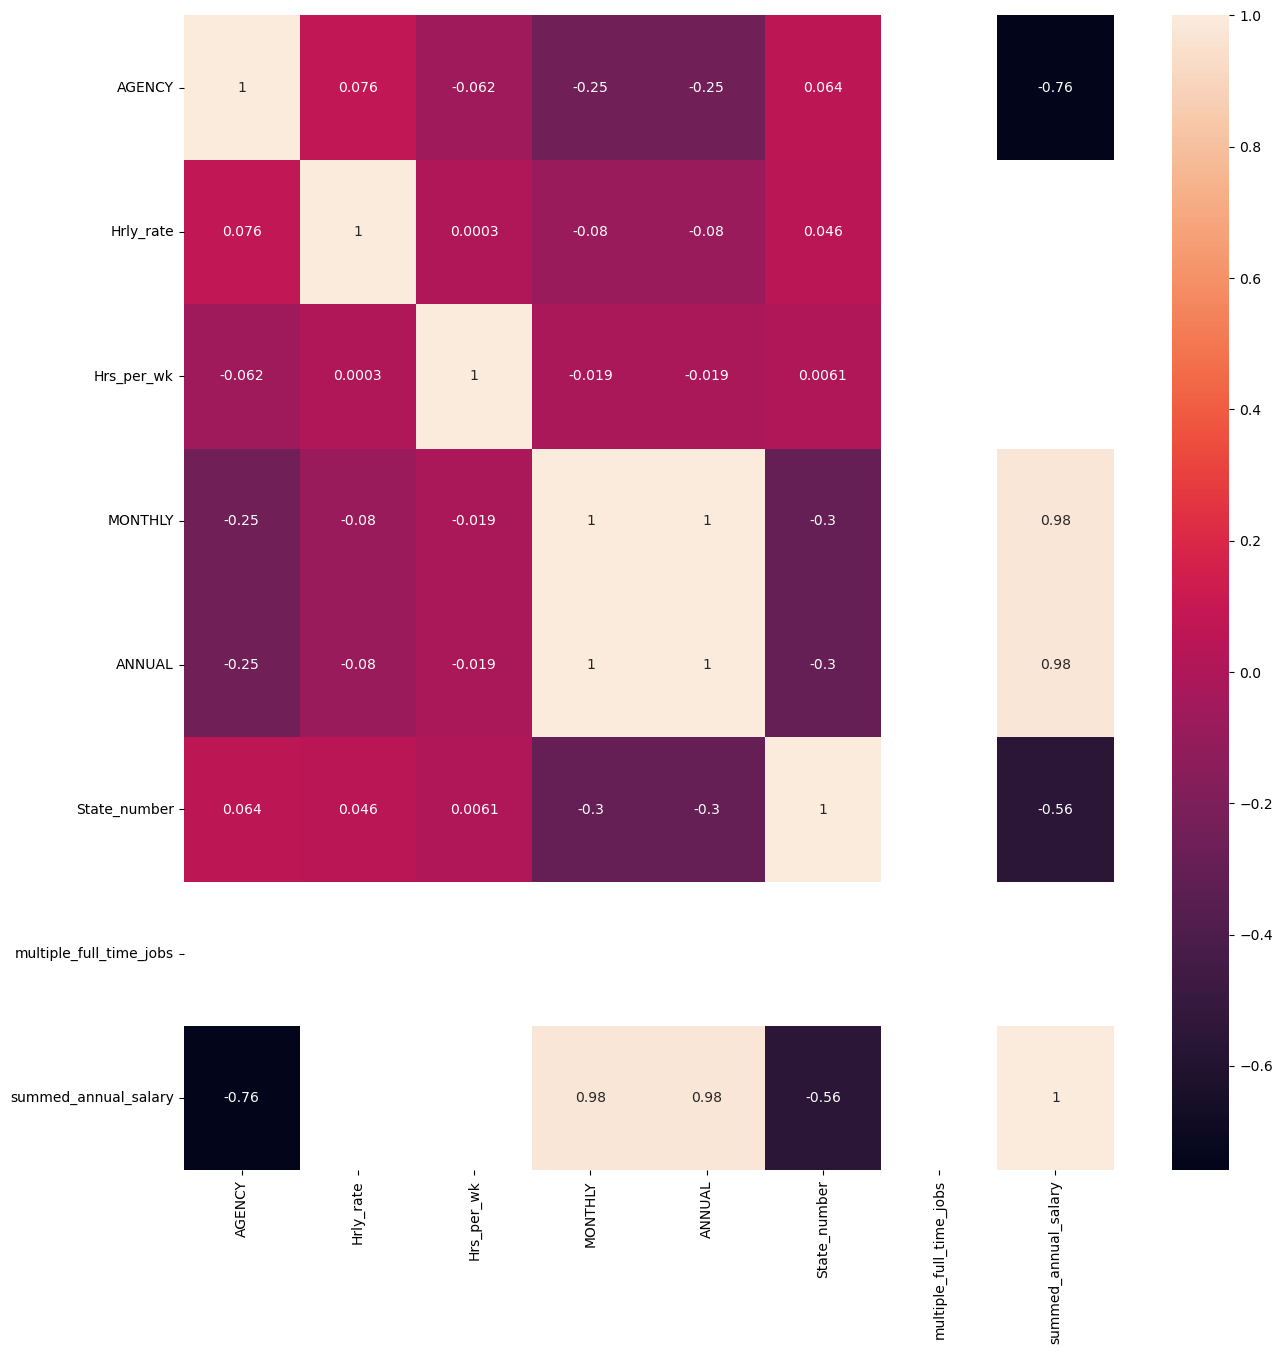

In [38]:
plt.figure(figsize=(15,15),facecolor='white') 
sns.heatmap(data=df.corr(),annot=True) 
plt.show()

# 5. Data Preprocessing and Feature Engineering

### Handling missing values: 

In [39]:
df.isnull().sum()

AGENCY                          0
Agency_name                     0
Last_name                       0
First_name                      0
MI                              0
Class_code                      0
Class_title                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
Employ_date                     0
Hrly_rate                       0
Hrs_per_wk                      0
MONTHLY                         0
ANNUAL                          0
State_number                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

In [40]:
df.columns

Index(['AGENCY', 'Agency_name', 'Last_name', 'First_name', 'MI', 'Class_code',
       'Class_title', 'ETHNICITY', 'GENDER', 'STATUS', 'Employ_date',
       'Hrly_rate', 'Hrs_per_wk', 'MONTHLY', 'ANNUAL', 'State_number',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [41]:
df1=df.drop(['Agency_name','Last_name','First_name','MI','Class_code','Employ_date','duplicated','multiple_full_time_jobs',
            'combined_multiple_jobs','summed_annual_salary','hide_from_search'],axis=1)

In [42]:
df1.head(5)

,AGENCY,Class_title,ETHNICITY,GENDER,STATUS,Hrly_rate,Hrs_per_wk,MONTHLY,ANNUAL,State_number
0,241,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,0.0,40.0,9545.82,114549.84,127717
1,212,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,0.0,40.0,1404.77,16857.24,127717
2,241,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,0.0,40.0,9545.82,114549.84,59115
3,212,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,0.0,40.0,1404.77,16857.24,59115
4,696,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.0,40.0,3284.27,39411.24,165030


## Converting the categorical data into numerical data :

### ~ Using LabelEncoder

In [43]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

In [44]:
df1.Class_title=label.fit_transform(df1.Class_title)
df1.ETHNICITY=label.fit_transform(df1.ETHNICITY)
df1.GENDER=label.fit_transform(df1.GENDER)
df1.STATUS=label.fit_transform(df1.STATUS)

In [45]:
df1.head(5)

,AGENCY,Class_title,ETHNICITY,GENDER,STATUS,Hrly_rate,Hrs_per_wk,MONTHLY,ANNUAL,State_number
0,241,711,5,1,8,0.0,40.0,9545.82,114549.84,127717
1,212,560,5,1,4,0.0,40.0,1404.77,16857.24,127717
2,241,711,5,1,8,0.0,40.0,9545.82,114549.84,59115
3,212,560,5,1,4,0.0,40.0,1404.77,16857.24,59115
4,696,292,3,0,0,0.0,40.0,3284.27,39411.24,165030


In [46]:
final_df = df1

# 6. Train Test Split

In [47]:
X = final_df.drop('ANNUAL',axis=1)
Y = final_df['ANNUAL']

In [48]:
X.head(5)

,AGENCY,Class_title,ETHNICITY,GENDER,STATUS,Hrly_rate,Hrs_per_wk,MONTHLY,State_number
0,241,711,5,1,8,0.0,40.0,9545.82,127717
1,212,560,5,1,4,0.0,40.0,1404.77,127717
2,241,711,5,1,8,0.0,40.0,9545.82,59115
3,212,560,5,1,4,0.0,40.0,1404.77,59115
4,696,292,3,0,0,0.0,40.0,3284.27,165030


In [49]:
Y.head(5)

0    114549.84
1     16857.24
2    114549.84
3     16857.24
4     39411.24
Name: ANNUAL, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [51]:
print(X.shape, X_train.shape, X_test.shape)

(149481, 9) (119584, 9) (29897, 9)


### Feature Normalization :

In [52]:
Continuous = ["Hrly_rate","Hrs_per_wk",'State_number','MONTHLY']

In [53]:
from sklearn.preprocessing import StandardScaler
std   = StandardScaler()


X_train[Continuous] = std.fit_transform(X_train[Continuous])
X_test[Continuous] = std.transform(X_test[Continuous])

In [54]:
X_traindf = pd.DataFrame(X_train, columns=X.columns)

X_traindf.head()

,AGENCY,Class_title,ETHNICITY,GENDER,STATUS,Hrly_rate,Hrs_per_wk,MONTHLY,State_number
59927,529,784,5,0,0,-0.052493,0.037814,-0.587091,-0.452324
131365,696,294,3,0,0,-0.052493,0.037814,-0.638879,1.333930
4689,302,1014,5,0,0,-0.052493,0.037814,0.816688,-1.120721
138760,802,538,5,1,0,-0.052493,0.037814,-0.312610,-0.791988
66552,529,1122,2,0,0,-0.052493,0.037814,-1.158233,-0.458197


# 5.Model Fitting

## I. Linear Regression :

In [55]:
from sklearn.linear_model import LinearRegression 
LR=LinearRegression() 

In [56]:
LR.fit(X_train,Y_train)  #object creation
y_predict=LR.predict(X_test) #training of linear regression

In [57]:
Y_train # Actual output values

59927     37244.04
131365    36238.08
4689      64512.00
138760    42575.76
66552     26149.80
            ...   
119879    45070.44
103694    43553.40
131932    41769.24
146867    42702.00
121958    22275.24
Name: ANNUAL, Length: 119584, dtype: float64

In [58]:
y_predict # Values predicted by model

array([37244.04, 36238.08, 64512.  , ..., 41769.24, 42702.  , 22275.24])

In [59]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error 

In [60]:
r2score=r2_score(Y_test,y_predict)
r2score

1.0

In [61]:
X_test.shape

(29897, 9)

In [62]:
## calculation of adjusted r2 score
adjusted_r2_LR = 1-(1-1.0)*(29897-9)/(29897-9-1) 
adjusted_r2_LR

1.0

## II. Decision Tree Regressor :

In [63]:
from sklearn.tree import DecisionTreeRegressor 

In [64]:
model = DecisionTreeRegressor(random_state=44)  

In [65]:
model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=44)

In [66]:
predictions = model.predict(X_test)

In [68]:
r2score=r2_score(Y_test,predictions)
r2score

0.9999999325660057

In [69]:
X_test.shape

(29897, 9)

In [70]:
## calculation of adjusted r2 score
adjusted_r2_DT = 1-(1-0.99)*(29897-9)/(29897-9-1) 
adjusted_r2_DT

0.989999665406364

## III. Random Forest Regressor :

In [71]:
from sklearn.ensemble import RandomForestRegressor 

In [72]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 

In [73]:
regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [74]:
predictions = model.predict(X_test)

In [75]:
y_predict=regressor.predict(X_test)

In [76]:
r2score=r2_score(Y_test,y_predict)
r2score

0.9999999448026411

In [77]:
## calculation of adjusted r2 score
adjusted_r2_RF = 1-(1-0.99)*(29897-9)/(29897-9-1) 
adjusted_r2_RF

0.989999665406364

## IV. Gradient Boosting Regressor :

In [78]:
from sklearn.ensemble import GradientBoostingRegressor

In [79]:
gbr=GradientBoostingRegressor(learning_rate=0.01, loss='squared_error', n_estimators=100)
gbr.fit(X_train,Y_train)
Y_predict=gbr.predict(X_test)

In [80]:
Y_predict=gbr.predict(X_test)
Y_predict

array([32978.66893734, 40650.55047726, 67663.07795818, ...,
       43673.93184399, 46217.74508446, 35768.79414139])

In [81]:
rfr_r2score = r2_score(Y_test,Y_predict)
rfr_r2score

0.8558396315716776

In [82]:
adjusted_r2_GB = 1-(1-0.85)*(29897-9)/(29897-9-1) 
adjusted_r2_GB

0.8499949810954596

# 6. Output Final Score

In [83]:
final_df1 = pd.DataFrame({'MODELS':['LG','DT','RF','GB'],
                        'ACCURACY':[adjusted_r2_LR,adjusted_r2_DT,adjusted_r2_RF,adjusted_r2_GB]})

In [84]:
final_df1

,MODELS,ACCURACY
0,LG,1.000000
1,DT,0.990000
2,RF,0.990000
3,GB,0.849995


<Axes: xlabel='MODELS', ylabel='ACCURACY'>

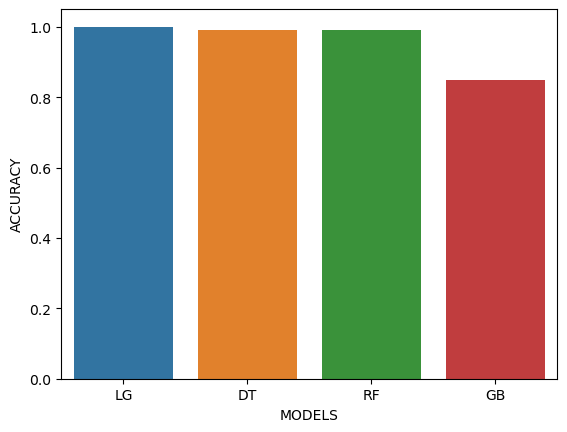

In [85]:
sns.barplot(x=final_df1['MODELS'],y=final_df1['ACCURACY'])

# 7. Model Comparison Report

# Conclusion :
    1. LINEAR REGRESSION
       > r2score = 1.0
       > adjusted_r2 = 1.0

    2. DECISION TREE REGRESSOR
       > r2score = 0.99
       > adjusted_r2 = 0.98

    3. RANDOM FOREST REGRESSOR
       > r2score = 0.99
       > adjusted_r2 = 0.98

    4. Gradient Boosting Regressor
       > r2score = 0.85      
       > adjusted_r2 = 0.84

NOTE : By comparing various regression machine learning models,we found that Linear Regression model is best suited for Texas Salary Prediction Dataset, based on the above listed r2score and adjusted_r2 score for respective machine learning models.

## Task 3

### Who are the outliers in the salaries?

In [87]:
data = pd.read_csv('salary.csv')

In [88]:
data.head(4)

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True


<Axes: xlabel='ANNUAL'>

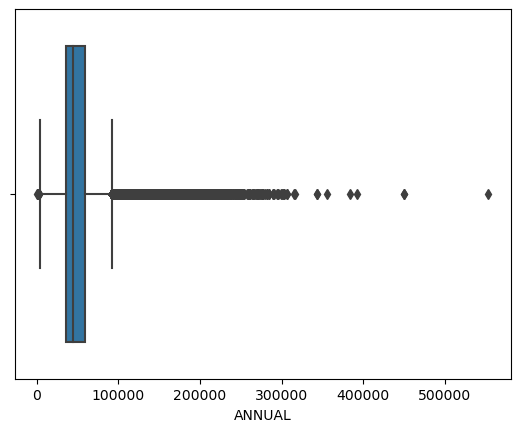

In [89]:
sns.boxplot(x='ANNUAL',data=data)

In [90]:
upper_limit = data['ANNUAL'].mean()+3*data['ANNUAL'].std()
lower_limit = data['ANNUAL'].mean()-3*data['ANNUAL'].std()
print(upper_limit)
print(lower_limit)



126066.23184851333
-24637.809902179026


In [91]:
data.loc[(data['ANNUAL']>upper_limit)]

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
5,302,OFFICE OF THE ATTORNEY GENERAL ...,ROGERS,SHAUNA,,1623,DIRECTOR IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,04/01/20,0.0,40.0,12899.00,154788.00,1177785,True,1.0,NaN,NaN,NaN
39,101,SENATE ...,CLEMENTS,DOUGLAS,M,7101,LEG. OFFICIAL/ADMINISTRATOR ...,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,01/04/10,0.0,40.0,11150.00,133800.00,136572,True,NaN,True,NaN,NaN
42,101,SENATE ...,CRABTREE,JAMES,E,7101,LEG. OFFICIAL/ADMINISTRATOR ...,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,10/01/16,0.0,40.0,10833.33,129999.96,181420,True,NaN,True,NaN,NaN
55,101,SENATE ...,LUPTON,ANGUS,C,7101,LEG. OFFICIAL/ADMINISTRATOR ...,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,04/13/06,0.0,40.0,10850.00,130200.00,148005,True,NaN,True,NaN,NaN
71,101,SENATE ...,STEINBACH,CHRISTOPHER,J,7101,LEG. OFFICIAL/ADMINISTRATOR ...,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,12/23/14,0.0,40.0,13000.00,156000.00,189382,True,NaN,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149304,809,STATE PRESERVATION BOARD ...,CASH,BOB,C,1630,DEPUTY DIRECTOR I ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,01/01/14,0.0,40.0,12483.34,149800.08,514276,NaN,NaN,NaN,NaN,NaN
149335,809,STATE PRESERVATION BOARD ...,GABY,LINDA,L,1622,DIRECTOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/06/95,0.0,40.0,10721.97,128663.64,103114,NaN,NaN,NaN,NaN,NaN
149359,809,STATE PRESERVATION BOARD ...,JAMES,ALICE,B,1622,DIRECTOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/14/91,0.0,40.0,10734.72,128816.64,185386,NaN,NaN,NaN,NaN,NaN
149374,809,STATE PRESERVATION BOARD ...,KOCH,MARGARET,M,1623,DIRECTOR IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,01/23/13,0.0,40.0,10583.34,127000.08,336971,NaN,NaN,NaN,NaN,NaN


In [92]:
lower = data.loc[data['ANNUAL']< lower_limit]
lower

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search


### ~  What departments/roles have the biggest wage disparities between managers and employees?

In [93]:
data.describe()

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


In [94]:
max_salary = data['ANNUAL'].max()
min_salary = data['ANNUAL'].min()

In [95]:
print(max_salary)
print(min_salary)

553500.0
600.0


In [96]:
row_with_max_salary = df.loc[data['ANNUAL'] == 553500]
row_with_max_salary

,AGENCY,Agency_name,Last_name,First_name,MI,Class_code,Class_title,ETHNICITY,GENDER,STATUS,Employ_date,Hrly_rate,Hrs_per_wk,MONTHLY,ANNUAL,State_number,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
83851,542,CANCER PREVENTION AND RESEARCH INSTITUTE OF TE...,WILLSON,JAMES,,C542,CHIEF SCIENTIFIC OFFICER ...,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,03/01/16,0.0,40.0,3720.17,44642.04,372291,NaN,NaN,NaN,NaN,NaN


In [97]:
row_with_min_salary = df.loc[data['ANNUAL'] == 600]
row_with_min_salary

,AGENCY,Agency_name,Last_name,First_name,MI,Class_code,Class_title,ETHNICITY,GENDER,STATUS,Employ_date,Hrly_rate,Hrs_per_wk,MONTHLY,ANNUAL,State_number,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
142067,530,HOUSE OF REPRESENTATIVES ...,HOUSTON,DONTE,D,7110,ELECTED OFFICIALS STAFF ...,BLACK,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,05/01/20,0.0,40.0,50.0,600.0,851628,NaN,NaN,NaN,NaN,NaN


### ~  Have salaries and total compensations for some roles/ departments/ head-count changed over time?

In [98]:
data1=data[['AGENCY NAME','CLASS TITLE','ANNUAL','EMPLOY DATE']]
data1

,AGENCY NAME,CLASS TITLE,ANNUAL,EMPLOY DATE
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",114549.84,02/18/88
1,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,16857.24,02/01/15
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",114549.84,02/01/20
3,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,16857.24,09/01/18
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,CORREC OFFICER IV ...,39411.24,06/29/20
...,...,...,...,...
149476,STATE PRESERVATION BOARD ...,SECURITY OFFICER III ...,34788.00,10/30/17
149477,STATE PRESERVATION BOARD ...,WEB ADMINISTRATOR III ...,66000.00,07/13/15
149478,STATE PRESERVATION BOARD ...,CUSTOMER SERVICE REP I ...,13447.20,10/15/12
149479,STATE PRESERVATION BOARD ...,PROGRAM SPECIALIST III ...,68929.92,09/22/89


In [99]:
df = data1.groupby([ 'AGENCY NAME','CLASS TITLE','EMPLOY DATE'])
x= df.first()
x

ANNUAL
AGENCY NAME                                        CLASS TITLE                                        EMPLOY DATE          
ALCOHOLIC BEVERAGE COMMISSION                      ACCOUNTANT I                                       04/01/15     39790.56
                                                                                                      05/01/19     39000.00
                                                                                                      12/02/19     39000.00
                                                   ACCOUNTANT II                                      10/26/15     42500.04
                                                   ACCOUNTANT IV                                      04/01/15     48240.00
...                                                                                                                     ...
WATER DEVELOPMENT BOARD                            SYSTEMS ANALYST VI                                 01/20/88     96603.48
                                                   SYSTEMS SUPPORT SPECIALIST II                      09/01/19     48000.00
                                                   SYSTEMS SUPPORT SPECIALIST III                     11/11/19     52722.36
                                                   WEB ADMINISTRATOR III                              09/28/09     72381.12
                                                   WEB ADMINISTRATOR V                                11/13/00     87178.08

[77110 rows x 1 columns]